#  Handwritten Digit Classification using Deep Learning

##  Scenario

A startup is developing a mobile app that scans handwritten digits from receipts and recognizes them for automated expense logging.  
As a data scientist, you're tasked with building a deep learning model that can classify handwritten digits (0 to 9).

You're given the **MNIST dataset**, which contains **70,000 grayscale images** (28x28 pixels) of handwritten digits.  
Your job is to create a model that can accurately predict the correct digit from an input image and help automate the expense recording process.

---

###  Objectives:
- Design and train a basic deep learning model for image classification.
- Evaluate the model’s performance.
- Visualize the results.
- Suggest improvements for enhanced accuracy.

# GitHub Link : [https://github.com/omicron9009/DL_Assignment](https://github.com/omicron9009/DL_Assignment)

##  Deep Learning Assignment - Scenario-Based

###  Scenario 1: Handwritten Digit Recognition for Expense Logging

A startup is developing a mobile app that scans **handwritten digits from receipts** and recognizes them for automated **expense logging**.  
As a data scientist, you're tasked with building a **deep learning model** to classify handwritten digits (`0 to 9`) using the **MNIST dataset**, which contains **70,000 grayscale images** of size **28x28 pixels**.

---

##  Objective

Build a deep learning model that accurately predicts the correct digit from an input image.

---

##  Design a Basic Deep Learning Model

###  **Model Type**:  
A **Feedforward Neural Network (FNN)**, also known as a **Multilayer Perceptron (MLP)**, as the **baseline model**.

###  **Architecture Overview**:

| Layer           | Description                                      |
|----------------|--------------------------------------------------|
| Input Layer     | 784 neurons (28 × 28 flattened pixels)          |
| Hidden Layer 1  | 128 neurons, **ReLU** activation                 |
| Output Layer    | 10 neurons (for digits 0–9), **Softmax** output |

---

##  Why This Architecture?

###  **Reason for Choosing This Model**:

1. **Simple and Effective**  
   A good starting point for small image classification tasks like MNIST.

2. **ReLU Activation**  
   Efficient for learning non-linear patterns.

3. **Softmax Output Layer**  
   Produces a **probability distribution** across 10 digit classes.

4. **Quick to Train**  
   Suitable for training without requiring GPU support.

> While **CNNs** usually outperform MLPs for image data, starting with an MLP helps establish a **performance baseline** with low computational cost.

---

##  How to Improve the Model for Better Accuracy

###  **Enhancement Techniques**:

1. **Switch to CNNs**  
   Use layers like `Conv2D`, `MaxPooling2D`, and `Dropout` to better handle image spatial information.

2. **Add More Layers/Units**  
   Increase network depth or hidden layer size to capture more complexity.

3. **Apply Dropout Regularization**  
   Prevent overfitting with dropout (e.g., between `0.2–0.5`).

4. **Use Data Augmentation**  
   Slightly rotate, scale, or shift images to improve generalization.

5. **Train Longer with Early Stopping**  
   Run more epochs and use early stopping when validation loss plateaus.

6. **Hyperparameter Tuning**  
   Tune learning rate, batch size, number of units/layers, and activation functions.

---



# Implementation 

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [15]:
# Load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


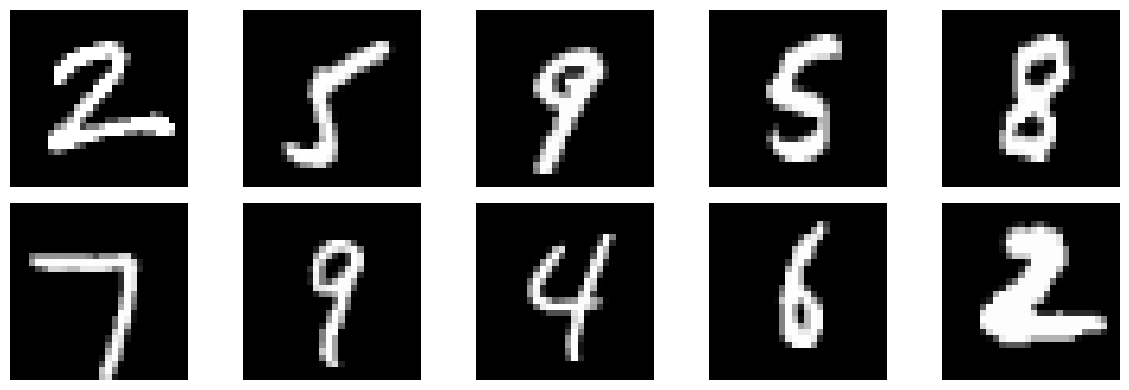

In [16]:
import matplotlib.pyplot as plt
import random

# Pick 10 random indices
random_indices = random.sample(range(X_train.shape[0]), 10)

# Plot the images
plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    image = X_train[idx].reshape(28, 28)  # reshape the flattened image back to 28x28
    label = np.argmax(y_train[idx])       # get the label from one-hot encoded vector

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [26]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [27]:
X_train = X_train.reshape(-1, 28 * 28)  # shape becomes (60000, 784)
X_test = X_test.reshape(-1, 28 * 28)    # shape becomes (10000, 784)


In [28]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [29]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])


In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8699 - loss: 0.4632 - val_accuracy: 0.9662 - val_loss: 0.1227
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9622 - loss: 0.1272 - val_accuracy: 0.9742 - val_loss: 0.0927
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9755 - loss: 0.0839 - val_accuracy: 0.9750 - val_loss: 0.0875
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9832 - loss: 0.0573 - val_accuracy: 0.9773 - val_loss: 0.0833
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0443 - val_accuracy: 0.9743 - val_loss: 0.0879


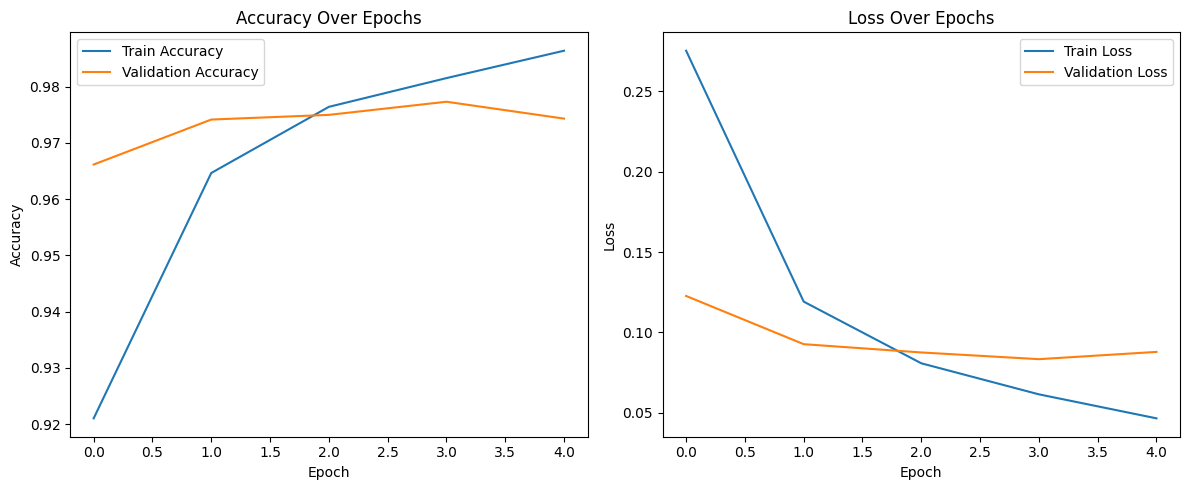

In [23]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1000
Test Accuracy: 0.9718


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


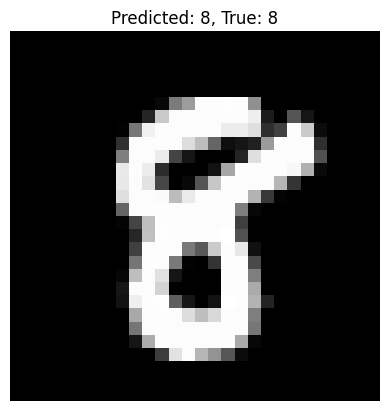

In [25]:
import matplotlib.pyplot as plt

# Pick a random image from the test set
index = random.randint(0, X_test.shape[0] - 1)
image = X_test[index]  # shape: (784,)
true_label = np.argmax(y_test[index])

# Reshape for prediction (model expects shape: (batch_size, 784))
image_reshaped = image.reshape(1, 784)

# Predict using the model
predicted_probs = model.predict(image_reshaped)
predicted_label = np.argmax(predicted_probs)

# Show the image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()


##  Scenario 2

A hospital wants to predict whether a patient is at risk of heart disease based on medical records (such as age, cholesterol, blood pressure, etc.). You are provided with a CSV file containing patient data, and a target column `has_disease` (0 = No, 1 = Yes).

---

##  Task

- Design a deep learning model using an Artificial Neural Network (ANN) to classify patients.
- Answer the following:
  1. What activation function would you use in the output layer and why?
  2. How would you handle class imbalance if `has_disease = 1` is rare?
  3. Implement the model in Keras (TensorFlow backend).

---

##  Q1: What activation function would you use in the output layer and why?

**Answer:**  
We use the **Sigmoid** activation function in the output layer because this is a **binary classification** problem. The sigmoid function outputs a probability between 0 and 1, which is ideal for determining the likelihood that a patient has heart disease. The output can then be interpreted directly as class 0 (no disease) or class 1 (disease).

---

##  Q2: How would you handle class imbalance if `has_disease = 1` is rare?

**Answer:**  
Class imbalance can be addressed using several methods:

1. **Class Weights (Recommended):**
   - Compute weights for each class to penalize the majority class and give more importance to the minority class.
   - This is passed as `class_weight` to `model.fit()` in Keras.

2. **Resampling Techniques:**
   - **Oversampling** the minority class (e.g., using SMOTE).
   - **Undersampling** the majority class to balance the dataset.
   
3. **Alternative Evaluation Metrics:**
   - Use metrics like **Precision**, **Recall**, **F1-Score**, and **AUC-ROC** instead of relying solely on accuracy, which can be misleading with imbalanced data.

---

##  Model Design Summary

| Component               | Choice                        |
|------------------------|-------------------------------|
| Model Type             | ANN (Multilayer Perceptron)   |
| Output Activation      | Sigmoid                       |
| Loss Function          | Binary Crossentropy           |
| Class Imbalance Fix    | Compute `class_weight`        |
| Evaluation Metrics     | Accuracy, Precision, Recall, AUC-ROC |


# Implemetation 

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [32]:
# Load the CSV
df = pd.read_csv('heart.csv')  # Replace with your actual file path

# Display first few rows
print(df.head())

# Rename 'target' to 'has_disease' if needed
df.rename(columns={'target': 'has_disease'}, inplace=True)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,has_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
# Features and target
X = df.drop('has_disease', axis=1)
y = df['has_disease']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Compute class weights
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

print("Class weights:", class_weights)


Class weights: {np.int64(0): np.float64(1.0275689223057645), np.int64(1): np.float64(0.9738717339667459)}


In [37]:
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

C:\Users\jadit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [39]:
# Train model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=50,
                    batch_size=16,
                    class_weight=class_weights,
                    verbose=1)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4438 - loss: 0.7579 - val_accuracy: 0.6195 - val_loss: 0.6522
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6848 - loss: 0.6329 - val_accuracy: 0.7659 - val_loss: 0.5569
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8170 - loss: 0.5285 - val_accuracy: 0.8146 - val_loss: 0.4645
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 0.4639 - val_accuracy: 0.8098 - val_loss: 0.4028
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8534 - loss: 0.3814 - val_accuracy: 0.8244 - val_loss: 0.3676
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.3583 - val_accuracy: 0.8439 - val_loss: 0.3466
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8541 - loss: 0.3635 - val_accuracy: 0.8439 - val_loss: 0.3382
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9068 - loss: 0.2988 - val_accuracy: 0.8390 - val_loss:

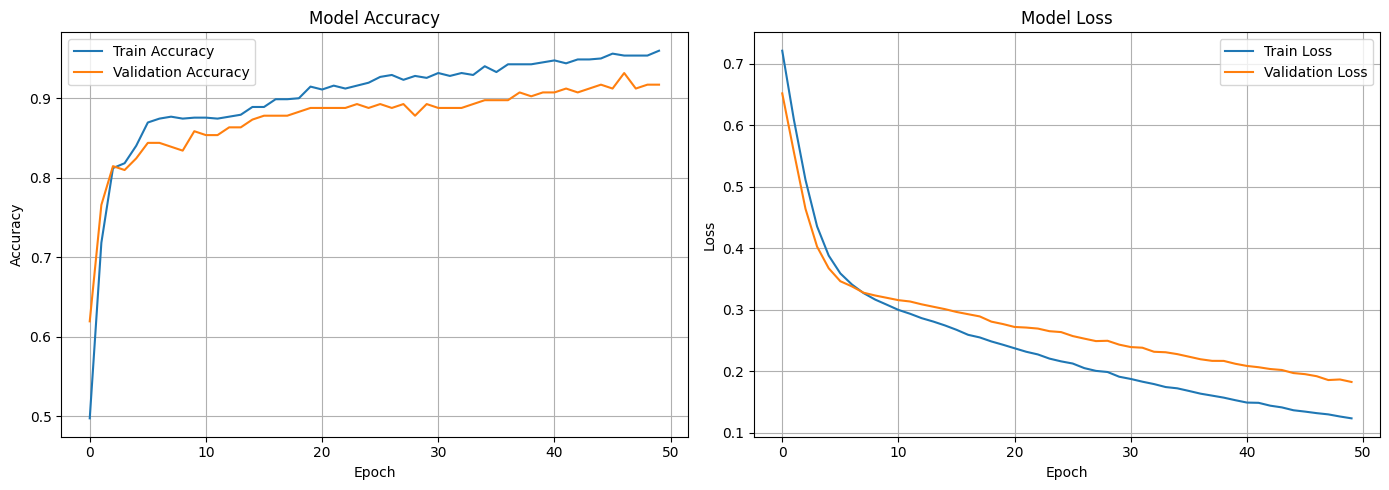

In [41]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [40]:
# Predict and evaluate
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.92      0.92      0.92       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205

Confusion Matrix:
 [[91  9]
 [ 8 97]]


In [44]:
# Example test input (replace with real patient values or loop over multiple)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
test_patient = np.array([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]])

# Scale input using the same scaler used for training
test_patient_scaled = scaler.transform(test_patient)

# Predict probability and class
pred_prob = model.predict(test_patient_scaled)[0][0]
pred_class = int(pred_prob > 0.5)

# Output results
print(f"Predicted probability of heart disease: {pred_prob:.4f}")
print(f"Predicted class: {'1 (Has disease)' if pred_class == 1 else '0 (No disease)'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted probability of heart disease: 0.1490
Predicted class: 0 (No disease)


C:\Users\jadit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
